In [1]:
%matplotlib inline 
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt



## EM for Mixture Distribution
### Generate data

In [2]:
np.random.seed(6011)
Phi = np.array([0.3, 0.7])
Loc = np.array([0, 2])
n = 500
Y = np.zeros(n)
for i in range(n):
    if np.random.uniform() < Phi[0]:
        Y[i] = np.random.normal(loc=Loc[0])
    else:
        Y[i] = np.random.normal(loc=Loc[1])


def f(j, y):# Initialize
    return norm.pdf(y, loc=Loc[j])


def P_phi(i, j, Phi_hat):
    """
    p_{\phi_hat}(u_i = j | y_i)
    """
    nominaor = Phi_hat[j]*f(j, Y[i])
    denominator = 0
    for j in range(2):
        denominator += Phi_hat[j]*f(j, Y[i])
    return nominaor/denominator

Phi_hat = np.array([0.5, 0.5]) 
niter = 50
Phi_store = np.zeros((niter, 2))
llk_store = np.zeros(niter)
# EM 
for k in range(niter):
    Phi_store[k,:] = Phi_hat
    llk_store[k] = np.sum(np.log(Phi_hat[0] * f(0, Y) + Phi_hat[1] * f(1, Y)))
    for j in range(2):
        Phi_hat[j] = np.average(P_phi(np.array(range(n)), j, Phi_store[k,:]))
    Phi_hat = Phi_hat / Phi_hat.sum()

    




In [7]:
# Initialize

Phi_hat = np.array([0.5, 0.5]) 
niter = 50
Phi_store = np.zeros((niter, 2))
llk_store = np.zeros(niter)
# EM 
for k in range(niter):
    Phi_store[k,:] = Phi_hat
    llk_store[k] = np.sum(np.log(Phi_hat[0] * f(0, Y) + Phi_hat[1] * f(1, Y)))
    for j in range(2):
        Phi_hat[j] = np.average(P_phi(np.array(range(n)), j, Phi_hat))
    Phi_hat = Phi_hat / Phi_hat.sum()




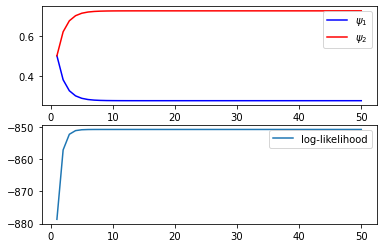

In [3]:
# Visualization 
x_plot = np.arange(niter)+1
fig, ax = plt.subplots(nrows = 2, ncols = 1)
ax[0].plot(x_plot, Phi_store[:, 0], color = 'blue', label = '$\psi_1$')
ax[0].plot(x_plot, Phi_store[:, 1], color = 'red', label = '$\psi_2$')
ax[0].legend()

ax[1].plot(x_plot, llk_store, label = 'log-likelihood')
ax[1].legend()
plt.show()

## Mixure Model (Parametric Case)

In [8]:
from scipy.stats import norm


In [9]:

# generate data
np.random.seed(6011)
Phi = np.array([0.3, 0.7])
Loc = np.array([0, 2])
n = 500
Y = np.zeros(n)
for i in range(n):
    if np.random.uniform() < Phi[0]:
        Y[i] = np.random.normal(loc=Loc[0])
    else:
        Y[i] = np.random.normal(loc=Loc[1])


In [10]:

def f(loc, y):
    return norm.pdf(y, loc=loc)

def P_phi(i, j, Phi_hat, Mu_hat):
    nominaor = Phi_hat[j]*f(Mu_hat[j], Y[i])
    denominator = 0
    for j in range(2):
        denominator += Phi_hat[j]*f(Mu_hat[j], Y[i])
    return nominaor/denominator


In [12]:

Phi_hat = np.array([0.5, 0.5])  # Initialize
Mu_hat = [-0.5, 0]


niter = 50
Phi_store = np.zeros((niter, 2))
Mu_store = np.zeros((niter, 2))

Phi_new = np.zeros(2)
Mu_new = np.zeros(2)

llk_store = np.zeros(niter)


for k in range(niter):
    Phi_store[k,:] = Phi_hat
    Mu_store[k,:] = Mu_hat
    llk_store[k] = np.sum(np.log(Phi_hat[0] * f(Mu_hat[0], Y) + Phi_hat[1] * f(Mu_hat[1], Y)))

    for j in range(2):
        Phi_new[j] = np.average(P_phi(np.array(range(n)), j, Phi_hat, Mu_hat))
    Phi_new = Phi_new / Phi_new.sum()
    for j in range(2):
        nominator = np.dot(Y, P_phi(np.array(range(n)), j, Phi_hat, Mu_hat))
        denominator = np.sum(P_phi(np.array(range(n)), j, Phi_hat, Mu_hat))
        Mu_new[j] = nominator/denominator

    Phi_hat = Phi_new.copy()
    Mu_hat = Mu_new.copy()

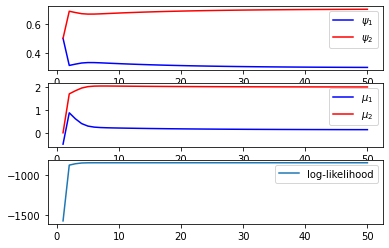

In [13]:

x_plot = np.arange(niter)+1
fig, ax = plt.subplots(nrows = 3, ncols = 1)
ax[0].plot(x_plot, Phi_store[:, 0], color = 'blue', label = '$\psi_1$')
ax[0].plot(x_plot, Phi_store[:, 1], color = 'red', label = '$\psi_2$')
ax[0].legend()
ax[1].plot(x_plot, Mu_store[:, 0], color = 'blue', label = '$\mu_1$')
ax[1].plot(x_plot, Mu_store[:, 1], color = 'red', label = '$\mu_2$')
ax[1].legend()
ax[2].plot(x_plot, llk_store, label = 'log-likelihood')
ax[2].legend()
plt.show()



## Logistic Ramdom Effects


In [26]:

import scipy.stats

I = 10
J = 15

X = np.zeros((I,J))

for i in range(I):
    for j in range(J):
        X[i,j] = (j+1) / J

Y = np.array([
    [1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
    [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])


def logf_comp(Y, X, u, beta, sigma2):
    I, J = Y.shape

    logllk =  -0.5 * I *  np.log(sigma2) - np.sum(u ** 2) / (2 * sigma2)

    for i in range(I):
        logllk = logllk + np.sum(Y[i,:] * (beta * X[i,:] + u[i])) - np.sum(np.log(1 + np.exp(beta * X[i, :] + u[i])))

    return logllk

def logf_ui(Y, X, ui, i, beta, sigma2):
    I, J = Y.shape

    logllk = -0.5 * np.log(sigma2) - ui ** 2 / (2 * sigma2)

    logllk = logllk + np.sum(Y[i,:] * (beta * X[i,:] + ui)) - np.sum(np.log(1 + np.exp(beta * X[i, :] + ui)))

    return logllk


def MH_u(Y, X, ind, beta, sigma2, u0, sigma0, nburnin, nthin, nsample):
    u_store = np.zeros(nsample)

    g = nburnin

    # Initialization
    u_iter = u0

    for i in range(nsample):
        for j in range(g):
            u_new = scipy.stats.norm.rvs(loc = 0, scale = sigma0)
            logalpha = logf_ui(Y, X, u_new, ind, beta, sigma2) + scipy.stats.norm.logpdf(x = u_iter, loc= 0, scale = sigma0) - logf_ui(Y, X, u_iter, ind, beta, sigma2) - scipy.stats.norm.logpdf(x=u_new, loc=0, scale=sigma0)
            alpha = np.min([np.exp(logalpha), 1])
            unif = scipy.stats.uniform.rvs()
            if (unif <= alpha):
                u_iter = u_new
        u_store[i] = u_iter
        g = nthin

    return u_store

# Initialization

np.random.seed(6011)
beta_init = 2
sigma2_init = 1



M = 2000
sigma0 = 1
nthin = 5
nburnin = 200

u0 = np.zeros((I, M))
u_start = 0





In [27]:

# MCEM algorithm
EM_iters = 50
beta_iter = beta_init
sigma2_iter = sigma2_init

beta_store = np.zeros(EM_iters)
sigma2_store = np.zeros(EM_iters)

Y_vec = np.matrix.flatten(Y)
X_vec = np.matrix.flatten(X)


for i_em in range(EM_iters):
    beta_store[i_em] = beta_iter
    sigma2_store[i_em] = sigma2_iter

    # weights = np.zeros(M)

    # Importance weights
    # for m in range(M):
    #     weights[m] = np.exp( logf_comp(Y, X, u0[:,m], beta_iter, sigma2_iter) - logf_comp(Y, X, u0[:,m], beta_init, sigma2_init) )
    # weights_sum = np.sum(weights)

    for ind in range(I):
        u0[ind, :] = MH_u(Y, X, ind, beta_iter, sigma2_iter, u_start, sigma0, nburnin, nthin, M)
    # Update sigma2
    u0sq = np.sum(u0 ** 2, axis=0)

    sigma2_new = np.sum(u0sq) / M / I

    Delta = 0
    H = 0
    # Update beta
    stepsize = 0
    for m in range(M):
        u_vec = np.repeat(u0[:,m], J)
        p_vec = 1.0 / (1 + np.exp(-beta_iter * X_vec - u_vec))

        Delta += np.sum(X_vec * (Y_vec - p_vec)) / M
        H += np.sum( (X_vec ** 2) * p_vec * (1 - p_vec))/ M


    # XTWX = np.dot(np.dot(X_vec.transpose(), W_exp), X_vec)
    stepsize = 1.0 / H * Delta
    beta_new = beta_iter + stepsize

    beta_iter = beta_new
    sigma2_iter = sigma2_new
#     print(beta_new, sigma2_new)



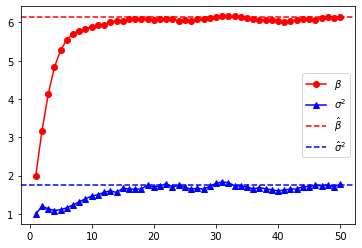

In [28]:

betahat = 6.132
sigma2hat = 1.766

fig = plt.figure()

plt.plot(np.arange(EM_iters)+1, beta_store, color = 'red', marker = 'o', label = '$\\beta$')
plt.plot(np.arange(EM_iters)+1, sigma2_store, color = 'blue', marker = '^', label = '$\sigma^2$')
plt.axhline(y = betahat, color = 'red', linestyle = 'dashed', label = '$\hat{\\beta}$')
plt.axhline(y = sigma2hat, color = 'blue', linestyle = 'dashed', label = '$\hat{\sigma}^2$')
plt.legend()
plt.show()

## Logistic Random Effects Importance Sampling

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in exp


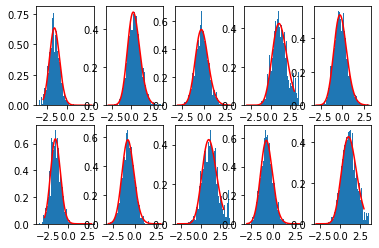

In [20]:
beta_init = 6
sigma2_init = 1.7



M = 2000
sigma0 = 1
nthin = 5
nburnin = 200

u0 = np.zeros((I, M))
u_start = 0
# Obtain u0

for ind in range(I):
    u0[ind,:] = MH_u(Y, X, ind, beta_init, sigma2_init, u_start, sigma0, nburnin, nthin, M)

x_linspace = np.linspace(-3,3,10000)

fig, ax = plt.subplots(nrows = I//5, ncols = 5)
import scipy.integrate

for ind in range(I):
    dens_linspace = np.zeros_like(x_linspace)
    C = scipy.integrate.quad(lambda x: np.exp(logf_ui(Y, X, x, ind, beta_init, sigma2_init)), a = -np.inf, b = np.inf)
    for i in range(len(x_linspace)):
        dens_linspace[i] = np.exp(logf_ui(Y, X, x_linspace[i], ind, beta_init, sigma2_init)) / C[0]

    u_iter = np.zeros(I)
    rowind = ind // 5
    colind = ind % 5
    ax[rowind, colind].hist(u0[ind, :], bins = 50, density=True)
    ax[rowind, colind].plot(x_linspace, dens_linspace, color = 'red', label = 'density')

plt.show()



In [23]:


# MCEM algorithm
EM_iters = 50
beta_iter = beta_init
sigma2_iter = sigma2_init

beta_store = np.zeros(EM_iters)
sigma2_store = np.zeros(EM_iters)

Y_vec = np.matrix.flatten(Y)
X_vec = np.matrix.flatten(X)

In [24]:


burnin_iter = 0
for i_em in range(EM_iters):
    beta_store[i_em] = beta_iter
    sigma2_store[i_em] = sigma2_iter

    if i_em < burnin_iter:
        for ind in range(I):
            u0[ind, :] = MH_u(Y, X, ind, beta_iter, sigma2_iter, u_start, sigma0, nburnin, nthin, M)
        # Update sigma2
        u0sq = np.sum(u0 ** 2, axis=0)

        sigma2_new = np.sum(u0sq) / M / I

        Delta = 0
        H = 0
        # Update beta
        stepsize = 0
        for m in range(M):
            u_vec = np.repeat(u0[:, m], J)
            p_vec = 1.0 / (1 + np.exp(-beta_iter * X_vec - u_vec))

            Delta += np.sum(X_vec * (Y_vec - p_vec)) / M
            H += np.sum((X_vec ** 2) * p_vec * (1 - p_vec)) / M

        # XTWX = np.dot(np.dot(X_vec.transpose(), W_exp), X_vec)
        stepsize = 1.0 / H * Delta
        beta_new = beta_iter + stepsize
        beta_init = beta_new
        sigma2_init = sigma2_new
    else:

        weights = np.zeros(M)

        # Importance weights
        for m in range(M):
            weights[m] = np.exp( logf_comp(Y, X, u0[:,m], beta_iter, sigma2_iter) - 
                                logf_comp(Y, X, u0[:,m], beta_init, sigma2_init) )
        weights_sum = np.sum(weights)

        # Update sigma2
        u0sq = np.sum(u0 ** 2, axis=0)

        sigma2_new = np.sum(weights * u0sq) / weights_sum / I

        Delta = 0
        H = 0
        # Update beta
        stepsize = 0
        for m in range(M):
            u_vec = np.repeat(u0[:,m], J)
            p_vec = 1.0 / (1 + np.exp(-beta_iter * X_vec - u_vec))

            Delta += np.sum(X_vec * (Y_vec - p_vec)) * weights[m] / weights_sum
            H += np.sum( (X_vec ** 2) * p_vec * (1 - p_vec)) * weights[m] / weights_sum


        # XTWX = np.dot(np.dot(X_vec.transpose(), W_exp), X_vec)
        stepsize = 1.0 / H * Delta
        beta_new = beta_iter + stepsize

    beta_iter = beta_new
    sigma2_iter = sigma2_new
    print(beta_new, sigma2_new, stepsize)



6.051689614416039 1.715321615861121 0.05168961441603856
6.082010653941433 1.7360071068516014 0.030321039525393927
6.102116229695223 1.7567945677629315 0.020105575753790822
6.116904519159504 1.775791935338137 0.014788289464280653
6.128555600371667 1.7925008932370379 0.011651081212163034
6.138103616757796 1.8069576102389415 0.00954801638612945
6.14609405910272 1.8193788730632412 0.007990442344923413
6.152854630021408 1.830022565828895 0.006760570918688182
6.158607970520327 1.8391361400992134 0.005753340498918902
6.163520014941279 1.8469402549520606 0.004912044420951961
6.167721916057119 1.8536259450366674 0.004201901115839451
6.171320885211957 1.8593566016217284 0.0035989691548373886
6.17440620090332 1.8642713429397457 0.0030853156913635354
6.17705297435057 1.8684884902999717 0.002646773447249733
6.17932477324911 1.8721087173877478 0.0022717988985403114
6.181275593992548 1.875217768190252 0.0019508207434379848
6.182951416605954 1.8778887575457268 0.001675822613406773
6.1843914656741195 1

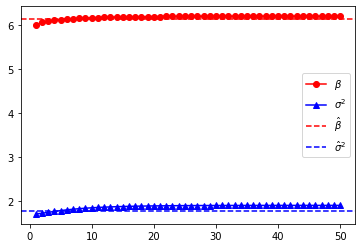

In [25]:

betahat = 6.132
sigma2hat = 1.766

fig = plt.figure()

plt.plot(np.arange(EM_iters)+1, beta_store, color = 'red', marker = 'o', label = '$\\beta$')
plt.plot(np.arange(EM_iters)+1, sigma2_store, color = 'blue', marker = '^', label = '$\sigma^2$')
plt.axhline(y = betahat, color = 'red', linestyle = 'dashed', label = '$\hat{\\beta}$')
plt.axhline(y = sigma2hat, color = 'blue', linestyle = 'dashed', label = '$\hat{\sigma}^2$')
plt.legend()
plt.show()